# Supplementary Methods 4

(c) 2020 Tom Röschinger. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

Here we look at the computation for genetic load.

In [235]:
using Jedi, Plots, LambertW, Statistics, CSV, DataFrames, Measures, StatsBase, LaTeXStrings

In [236]:
Jedi.default_pyplot!()

Plots.PyPlotBackend()

First we load in the simulation data, which is one energy for each run. There are man replicates for each fixed length and $\kappa$.

In [237]:
function get_max(df, l, rho)
    hist_df = combine(groupby(df, [:l, :rho, :gamma]), nrow)
    temp_df = hist_df[(hist_df.l .== l) .& (hist_df.rho .== rho), :]
    max_g = temp_df.nrow |> argmax |> x-> temp_df.gamma[x]
    return max_g
end

get_max (generic function with 1 method)

First we just look at discrete energy values, meaning that the mean energy is given by the energy of a single sequence. Here we set $\beta=\epsilon/k_B T$ with $\epsilon=2k_B T$ and represent the state of the sequences by the number of mismatches.

In [238]:
Est(l) = 2*(3/4 * l - 5)
N = 1000
f0 = 50/2N

F = Jedi.fermi_fitness(f0=f0, E_Star=Est, beta=1)

fermi_fitness(10, 1.0, 0.025, 0.0, Est)

First we compute the distribution of mismatches in the absence of fitness. This is simply given by a binomial distribution, which could also be approximated by a Gaussian (we show how well that works below).

## Discrete

In [253]:
function theoretical(rho, F)

    k_max = zeros(33)
    k_max_smooth = zeros(33)
    k_msb = zeros(33)

    Load = zeros(33)
    Load_smooth = zeros(33)
    Load_msb = zeros(33)

    for (j, l_0) in enumerate(8:40)
        F.l = l_0
        Q_0 = zeros(Float64, l_0+1)
        for (i, l) in enumerate(0:l_0)
            Q_0[i] = binomial(l_0, l) * (1/4)^(l_0-l) * (3/4)^(l) * exp(2N/(1+rho)*fitness(2l, F))
        end

        Q_0_smooth = zeros(Float64, l_0+1)

        for (i, l) in enumerate(0:l_0)
            Q_0_smooth[i] = exp(-1/2*(l-l_0/4*3)^2/(3*l_0/16)) * exp(2N/(1+rho)*fitness(2l, F))
        end

        Z = lambertw(4/3 * N * f0 * l_0 * exp(10)/(1+rho))/2

        k_max[j] = argmax(Q_0)-1
        k_max_smooth[j] = argmax(Q_0_smooth)-1
        k_msb[j] = -Z +l_0/4 * 3

        Load[j] = 2N*(F.f0 - fitness(2k_max[j], F))
        Load_smooth[j] = 2N*(F.f0 - fitness(2k_max_smooth[j], F))
        Load_msb[j] =3/4 *  1/(l_0) * Z * (1+rho) * 4
    end
    return k_max, k_max_smooth, k_msb, Load, Load_smooth, Load_msb
end

theoretical (generic function with 1 method)

### Mutation Selection Balance

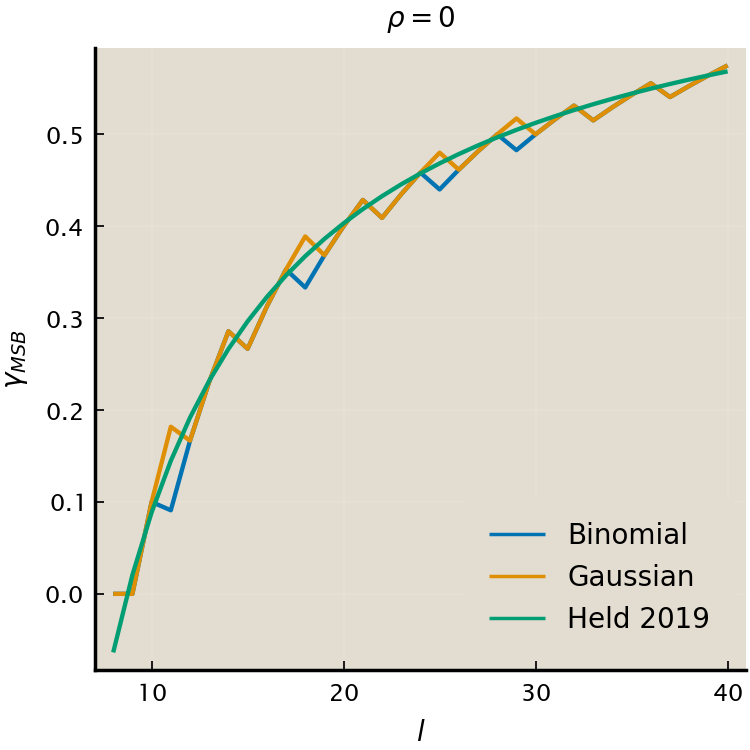

In [254]:
k_max0, k_max_smooth0, k_msb0 = theoretical(0, F)[1:3]
plot(8:40, k_max0 ./ collect(8:40), ylabel=L"$\gamma_{MSB}$", xlabel=L"$l$", label="Binomial", legend=:bottomright, title=L"$\rho=0$")
plot!(8:40, k_max_smooth0./ collect(8:40), label="Gaussian")
plot!(8:40, k_msb0./ collect(8:40), label="Held 2019")
#scatter!(8:40, [get_max(df, l, 0) for l in 8:40]./ 2)

In [255]:
savefig("../figures/supp4_gamma_msb_0_comp_discrete.pdf")

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parame

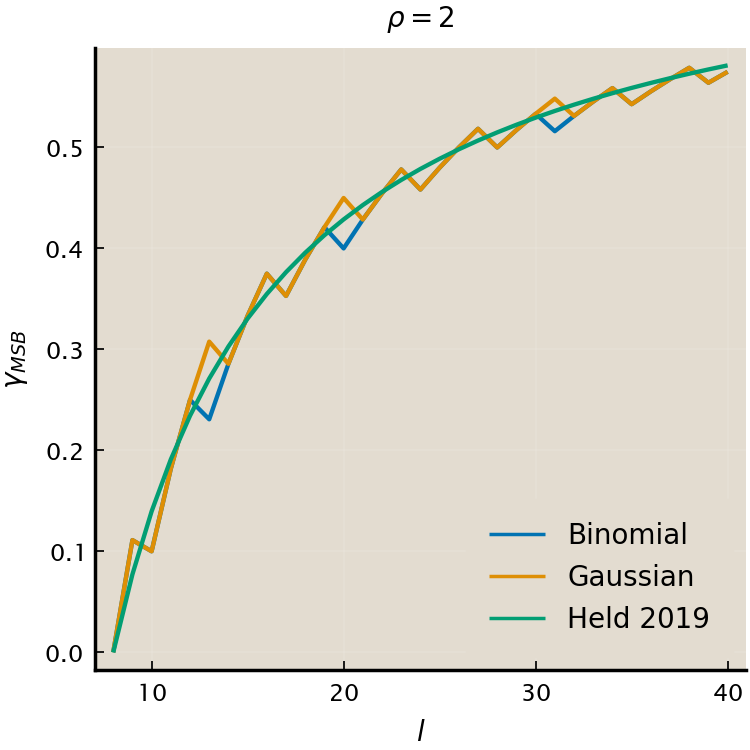

In [256]:
k_max2, k_max_smooth2, k_msb2 = theoretical(2, F)[1:3]
plot(8:40, k_max2 ./ collect(8:40), ylabel=L"$\gamma_{MSB}$", xlabel=L"$l$", label="Binomial", legend=:bottomright, title=L"$\rho=2$")
plot!(8:40, k_max_smooth2 ./ collect(8:40), label="Gaussian")
plot!(8:40, k_msb2 ./ collect(8:40), label="Held 2019")
#scatter!(8:40, [get_max(df, l, 0.1) for l in 8:40]./ 2)

In [257]:
savefig("../figures/supp4_gamma_msb_2_comp_discrete.pdf")

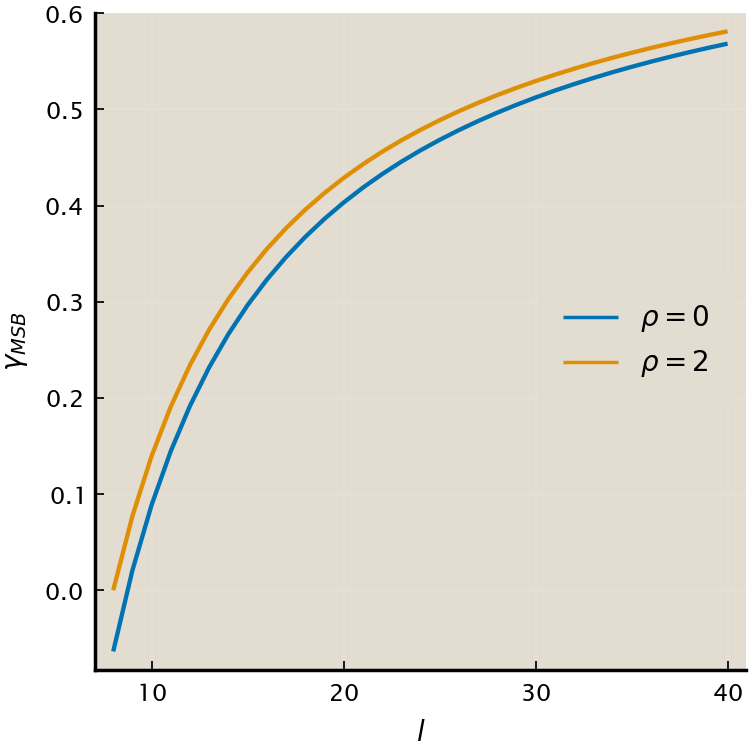

In [258]:
plot(8:40, k_msb0 ./ collect(8:40), ylabel=L"$\gamma_{MSB}$", xlabel=L"$l$", legend=:right, label=L"\rho=0")
plot!(8:40, k_msb2 ./ collect(8:40), label=L"\rho=2")

In [259]:
savefig("../figures/gamma_msb_0_comp_held.pdf")

k_max, k_max_smooth, k_msb, Load, Load_smooth, Load_msb = theoretical(1)
plot(8:40, k_max, ylabel="k_MSB", xlabel="l", label="binomial", legend=:topleft, title="Rho=1")
plot!(8:40, k_max_smooth, label="Gaussian")
plot!(8:40, k_msb, label="Held2019")
scatter!(8:40, [get_max(df, l, 1) for l in 8:40]./ 2)

k_max, k_max_smooth, k_msb, Load, Load_smooth, Load_msb = theoretical(2)
plot(8:40, k_max, ylabel="k_MSB", xlabel="l", label="binomial", legend=:topleft, title="Rho=2")
plot!(8:40, k_max_smooth, label="Gaussian")
plot!(8:40, k_msb, label="Held2019")
scatter!(8:40, [get_max(df, l, 2) for l in 8:40]./ 2)

### Load

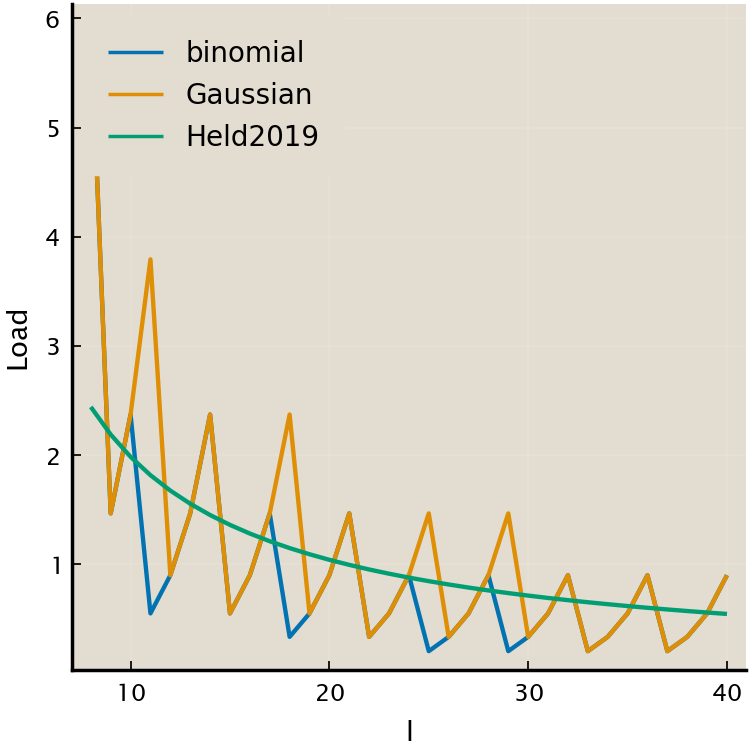

In [260]:
Load0, Load_smooth0, Load_msb0 = theoretical(0, F)[4:6]
plot(8:40, Load0, ylabel="Load", xlabel="l", label="binomial", legend=:topleft)
plot!(8:40, Load_smooth0, label="Gaussian")
plot!(8:40, Load_msb0, label="Held2019")

In [261]:
savefig("../figures/load_0_comp_discrete.pdf")

In [262]:
function theoretical_smooth(rho, fl=0)
    k_max_smooth = zeros(33)
    k_msb = zeros(33)

    Load_smooth = zeros(33)
    Load_msb = zeros(33)


    for (j, l_0) in enumerate(8:40)
        F.l = l_0

        Q_0_smooth = zeros(Float64, 10l_0 + 1)

        for (i, l) in enumerate(0:0.1:l_0)
            Q_0_smooth[i] = exp(-1/2*(l-l_0/4*3)^2/(3*l_0/16)) * exp(2N/(1+rho)*fitness(2l, F))
        end
        Z = lambertw(4/3 * N * f0 * l_0 * exp(10)/(1+rho))/2

        k_max_smooth[j] = argmax(Q_0_smooth)-1
        k_msb[j] = -Z +l_0/4 * 3
        g = collect(0:0.1:l_0)

        Load_smooth[j] = 2N*(F.f0 - sum(fitness.(2g, F) .* Q_0_smooth)/sum(Q_0_smooth)) + 2N*fl*l_0
        Load_msb[j] = 3/4 * 1/(l_0) * Z * (1+rho)*4 + 2N*fl*l_0
    end
    return k_max_smooth, k_msb, Load_smooth, Load_msb
end

theoretical_smooth (generic function with 2 methods)

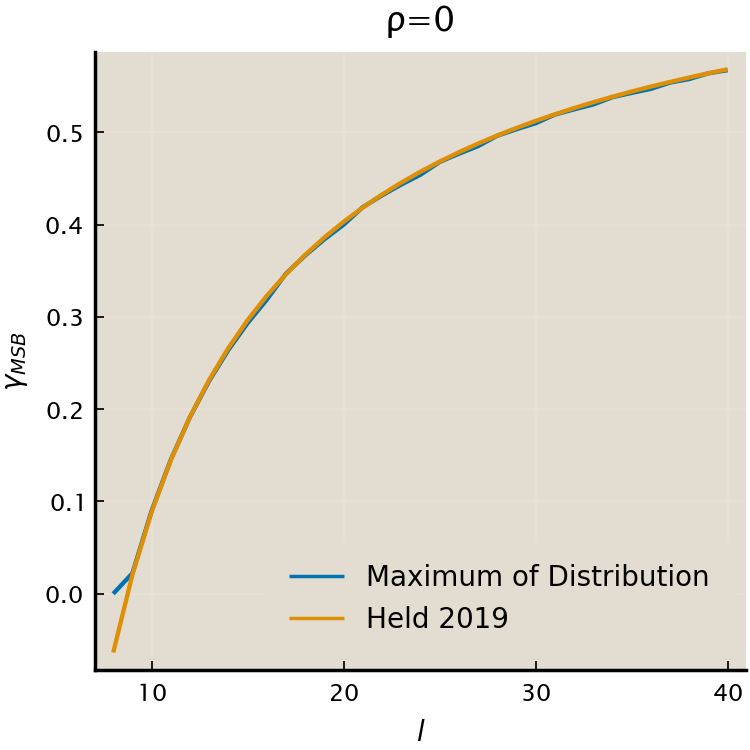

In [263]:
k_max_smooth0, k_msb0, Load_smooth0, Load_msb0 = theoretical_smooth(0)
plot(
    8:40, 
    k_max_smooth0 ./10 ./collect(8:40), 
    ylabel=L"$\gamma_{MSB}$", 
    xlabel=L"$l$", 
    label="Maximum of Distribution", 
    legend=:bottomright, 
    title="ρ=0", 
    titlefontsize=10
)

plot!(8:40, k_msb0./collect(8:40), label="Held 2019")
#scatter!(8:40, [get_max(df, l, 0) for l in 8:40]./ 2, label="Simulation Data")

In [264]:
savefig("../figures/supp4_gamma_msb_0_comp_smooth.pdf")

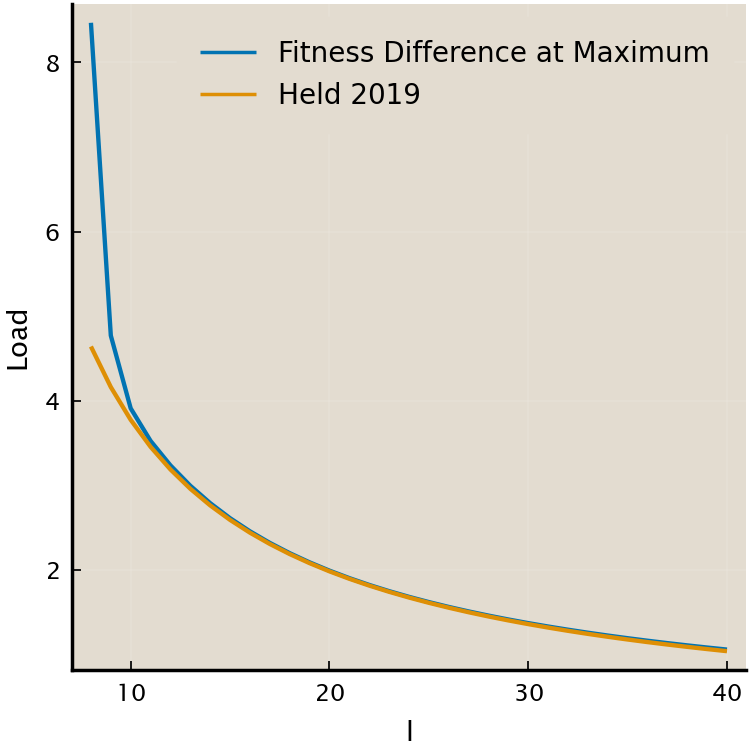

In [265]:
k_max_smooth, k_msb, Load_smooth, Load_msb = theoretical_smooth(1)
p_original = plot(8:40, Load_smooth, ylabel="Load", xlabel="l", label="Fitness Difference at Maximum", legend=:topright)
plot!(p_original, 8:40, Load_msb, label="Held 2019")

In [266]:
savefig("../figures/load_0_comp_smooth.pdf")

### Optimal length scaling

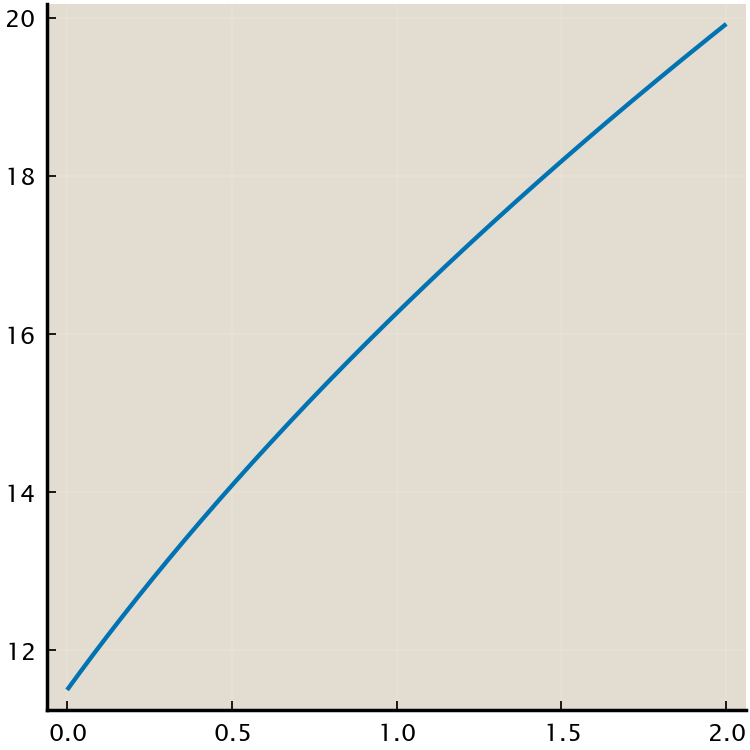

In [270]:
lambda = 2N * 0.3/2N * lambertw(4/3 * f0 * N * 10 * exp(10))
plot(0:0.01:2, [lambertw(4/3 * f0 * N * 10 * exp(10)) * sqrt((1+x)/lambda * 3)  for x in 0:0.01:2])

In [272]:
lambertw(4/3 * f0 * N * 10 * exp(10))

13.22689103349172

### Scaling of Load with length

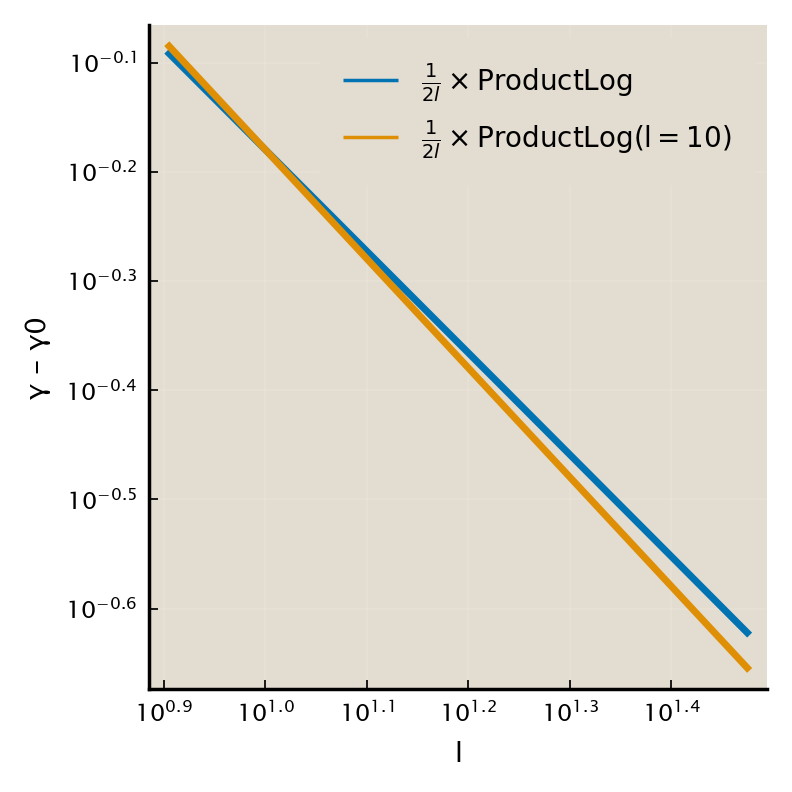

┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/tomroschinger/.julia/packages/Plots/6RLiv/src/args.jl:1211
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/tomroschinger/.julia/packages/Plots/6RLiv/src/args.jl:1211


In [274]:
plot(
    8:0.1:30, 
    [1/2l*lambertw(4/3 * f0 * N * l * exp(10)) for l in 8:0.1:30], 
    label=L"$\frac{1}{2l}\times \mathrm{ProductLog}$", 
    xlabel="l",
    ylabel="γ - γ0",
    linewidth=2,
    legend=:topright,
)

plot!(
    8:0.1:30, 
    [1/2l * lambertw(4/3 * f0 * N * 10 * exp(10)) for l in 8:0.1:30], 
    label=L"$\frac{1}{2l}\times \mathrm{ProductLog(l=10)}$", 
    linewidth=2
)

savefig("../figures/supp4_productlog.pdf")

### Scaling of Load with non-equ

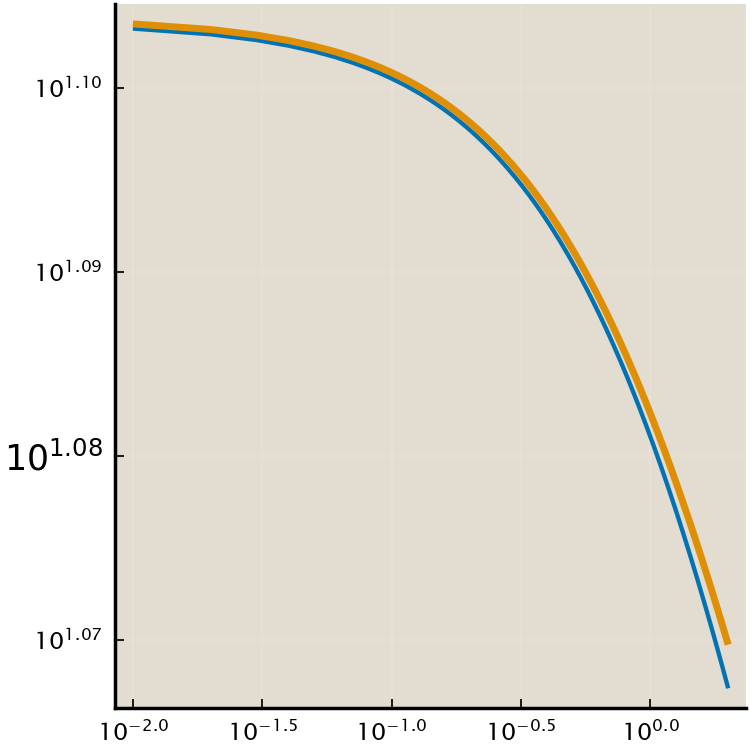

In [287]:
plot(
    0.01:0.01:2, 
    [lambertw(3/4 * f0*N * 10 * exp(10)/(1+rho)) for rho in 0.01:0.01:2],
    xscale=:log10,
    yscale=:log10
)
plot!(
    0.01:0.01:2, 
    [12.7/(1+rho)^(1/14) for rho in 0.01:0.01:2], 
    label="", 
    linewidth=2
)